In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#출력 그림 크기 조절
sns.set(rc={'figure.figsize':(12,12)})
plt.style.use('ggplot')
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('data/train0712.csv', encoding = 'ansi')
test = pd.read_csv('data/test0712.csv', encoding = 'ansi')

submission = pd.read_csv('data/sample_submission.csv')

In [3]:
from sklearn.ensemble import RandomForestRegressor

In [4]:
corr = train.corr()["등록차량수"].abs().sort_values(ascending=False)
corr.head(20)


등록차량수             1.000000
단지내주차면수           0.847196
총세대수              0.596356
총임대가구수            0.586707
가구당주차면수           0.512999
임대료               0.481635
공급유형_공공임대(10년)    0.410467
임대보증금             0.388964
30대(남자)           0.328977
30대(여자)           0.328937
임대건물구분            0.317295
공급유형_임대상가         0.317295
자격유형_D            0.317295
자격유형_C            0.305958
주거율               0.291565
면적_70             0.266881
면적_30             0.266387
면적_100            0.262414
50대(남자)           0.252389
자격유형_A            0.239622
Name: 등록차량수, dtype: float64

In [5]:
X = train.copy()
X = X.loc[:,corr.index[0:10]]
X.drop(['등록차량수',  ],axis=1, inplace=True)
feature_names = X.columns.to_list()
# scaler = StandardScaler()
# X = scaler.fit(X).transform(X)

y = train.loc[:,'등록차량수']

# 피쳐 선택은 나중에 우선 상관도 높은 20개 사용 

In [6]:
model = RF = RandomForestRegressor(n_jobs=-1, random_state=300, max_depth =12,min_samples_leaf =2,min_samples_split=2,n_estimators=200)
model.fit(X, y)

X_test = test[feature_names]
pred = RF.predict(X_test)

submission['num'] = pred
#submission.to_csv('sub/baseline0713_RF_cod.csv', index=False)

<BarContainer object of 9 artists>

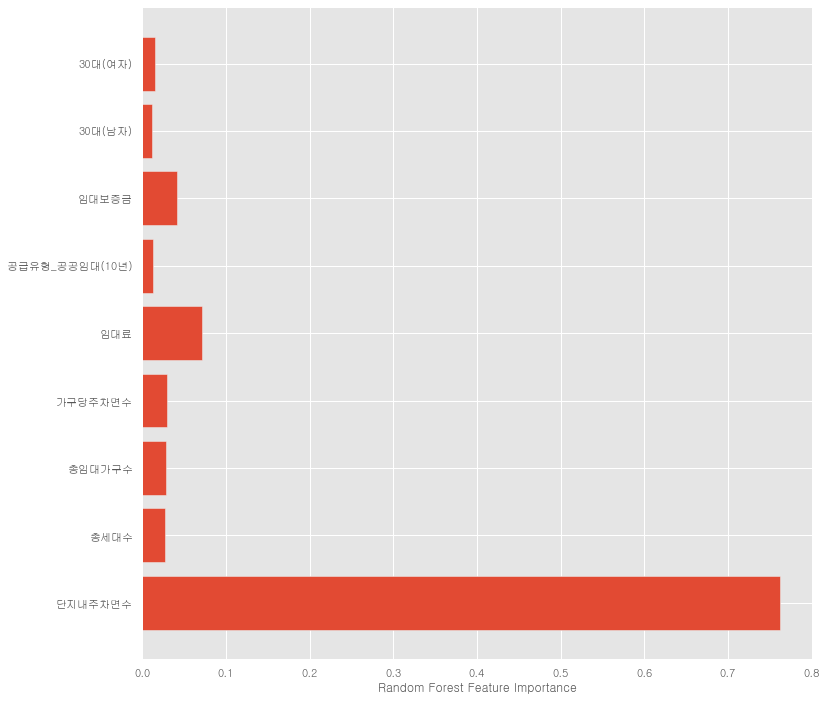

In [7]:
importances = RF.feature_importances_
plt.xlabel("Random Forest Feature Importance")
plt.barh(feature_names, importances)

In [8]:
importance = pd.Series(RF.feature_importances_,feature_names)
importance.abs().sort_values(ascending=False)

단지내주차면수           0.762178
임대료               0.071731
임대보증금             0.041416
가구당주차면수           0.029114
총임대가구수            0.028357
총세대수              0.026594
30대(여자)           0.015684
공급유형_공공임대(10년)    0.012969
30대(남자)           0.011956
dtype: float64

In [9]:
X = train.copy()
X = X.loc[:,importance.index[0:3]]
#X.drop(['등록차량수',  ],axis=1, inplace=True)
feature_names = X.columns.to_list()
# scaler = StandardScaler()
# X = scaler.fit(X).transform(X)

y = train.loc[:,'등록차량수']

# 피쳐 선택은 나중에 우선 상관도 높은 20개 사용 

In [10]:
model = RF = RandomForestRegressor(n_jobs=-1, random_state=300, max_depth =12,min_samples_leaf =2,min_samples_split=2,n_estimators=200)
model.fit(X, y)

X_test = test[feature_names]
pred = RF.predict(X_test)

submission['num'] = pred
submission.to_csv('sub/0713_RF_cod_2.csv', index=False)

In [11]:
submission

,code,num
0,C1072,580.235644
1,C1128,1294.521984
2,C1456,559.261893
3,C1840,571.180296
4,C1332,1048.627317
...,...,...
145,C2456,302.238745
146,C1266,500.335465
147,C2152,36.392179
148,C1267,490.863767
